ASSIGNMENT 3

We import all the necessary libraries

In [18]:
from numpy import array
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as sps
from sklearn.metrics import mean_squared_error
import pylab as pl
import math

EX 1

Defining the A function where the random variable follows a Gamma distribution

In [19]:
def The_A(tau, alpha, beta, nsim):
    for u in range(0,nsim):
        Gamma=np.random.gamma(tau, 1, nsim)
        phi=norm.cdf(alpha+beta*(Gamma/np.sqrt(tau)))
        return (phi)


EX 2

We define the closed from for the Call option under the Gamma distribution

In [20]:
def NECallPrice(sigma,delta,K,T,S0,r,nsim): 
    d1 = (np.log(S0/K)+(r*T) + (0.5*sigma**2*r**T)*(1-delta**2) + T*np.log(1-sigma*delta))/(sigma*np.sqrt(T)*np.sqrt(1-delta**2))
    h1 = delta/(np.sqrt(1-delta**2)*(1-sigma*delta))
    d2 = d1 - sigma*np.sqrt(T)*np.sqrt(1-delta**2)
    h2 = h1*(1-sigma*delta)

    C = S0*The_A(T, d1, h1, nsim).mean() - np.exp(-r*T)*K*The_A(T, d2, h2, nsim).mean()
    return(C)

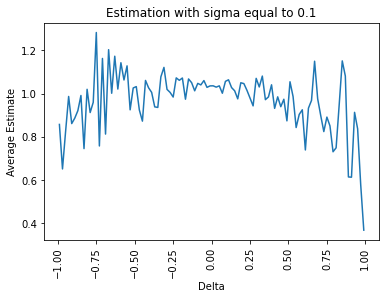

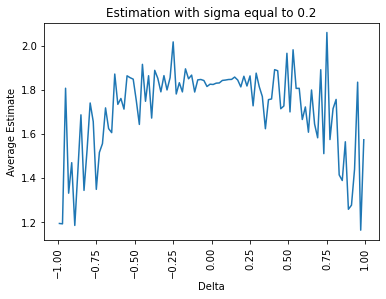

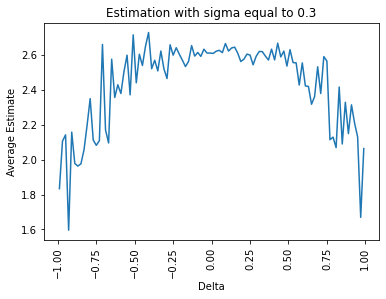

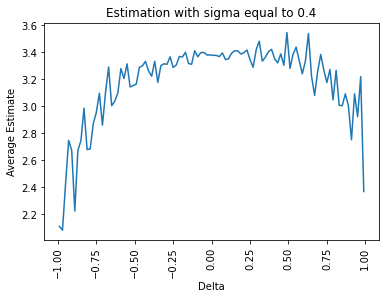

In [21]:
T = 2/12
sigma = [0.1,0.2,0.3,0.4]
delta = np.linspace(-0.99, 0.99, 100)

for i in sigma:
    
    res = []
    
    for j in delta:
        
        result=NECallPrice(i,j,50,T,50,0.05,10000)
        res.append(result)

    plt.plot(delta,res)
    plt.title('Estimation with sigma equal to ' + str(i))
    plt.xlabel('Delta')
    plt.xticks(rotation=90)
    plt.ylabel('Average Estimate')

    plt.show()

Increasing sigma we can see that the price scale of options increases, as it expected also in the B-S formula. More interestingly, also the curvature of the option price gets steeper as it can be clearly seen looking at the values for delta=0

We compute the minimization function to retrieve (sigma,delta) of the option price, given the gamma distribution

In [22]:
def NECallIVIS(CallPrice,S0,K,T,r,nsim,startingval):
    def NECallIVISparams(params):
        return np.mean((NECallPrice(params[0], params[1],K,T,S0,r,nsim)-CallPrice)**2)
    res = sp.optimize.minimize(NECallIVISparams, startingval, method = 'Nelder-Mead', options={'maxiter': 10000, 'maxfev': 10000})
    return res

In [23]:
startingval = [0.10,0.10]
NECallIVIS(3,50,50,2/12,0.10,100, startingval)

 final_simplex: (array([[0.10423463, 0.0990503 ],
       [0.10423463, 0.0990503 ],
       [0.10423463, 0.0990503 ]]), array([0.62753956, 2.1016529 , 3.16962376]))
           fun: 0.627539556514675
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 10001
           nit: 3752
        status: 1
       success: False
             x: array([0.10423463, 0.0990503 ])

We divide the options dataset according to modmoneyness, dividing the whole sample in 3 groups with labels (-1,0,1)

In [24]:
df = pd.read_excel('OptionsData9095_a3.xls')
df['modmoneyness']=np.log(df['Stock']/df['Strike']) - df['Maturity']/360*df['Rate']
df.loc[df['modmoneyness'] < -0.01, 'moneynessgroup'] = -1
df.loc[df['modmoneyness'] > 0.01, 'moneynessgroup'] = 1
df = df.fillna(0)
df

,Date,Maturity,Strike,Price,Stock,Rate,modmoneyness,moneynessgroup
0,900103,16,320,39.6250,358.1432,0.069118,0.109540,1.0
1,900103,16,325,34.7500,358.1432,0.069118,0.094036,1.0
2,900103,16,330,29.8125,358.1432,0.069118,0.078768,1.0
3,900103,16,335,24.8125,358.1432,0.069118,0.063730,1.0
4,900103,16,340,20.5000,358.4332,0.069118,0.049725,1.0
...,...,...,...,...,...,...,...,...
21747,951227,176,650,9.0000,607.7365,0.052664,-0.092978,-1.0
21748,951227,176,660,6.1250,606.8865,0.052664,-0.109645,-1.0
21749,951227,176,665,4.9375,606.9565,0.052664,-0.117077,-1.0
21750,951227,176,675,2.8750,606.8665,0.052664,-0.132151,-1.0


EX 3 

We first define a closed-from solution for the Down-In-Put under the GBM dynamics 

In [25]:
def DownInPut(S0,K,r,T,sigma,Sb):
    
    ll = (r + sigma**2/2)/sigma
    y = (np.log(Sb**2/(S0*K))/(sigma*np.sqrt(T))) + ll*sigma*np.sqrt(T)
    x1 = (np.log(S0/Sb)/(sigma*np.sqrt(T))) + ll*sigma*np.sqrt(T)
    y1 = (np.log(Sb/S0)/(sigma*np.sqrt(T))) + ll*sigma*np.sqrt(T)
    
    Pdo=-S0*norm.cdf(-x1) + K*np.exp(-T*r)*norm.cdf(-x1+sigma*np.sqrt(T)) + S0*(Sb/S0)**(2*ll)*(norm.cdf(y) - norm.cdf(y1)) - K*np.exp(-T*r)*(Sb/S0)**(2*ll-2)*(norm.cdf(y - sigma*np.sqrt(T)) - norm.cdf(y1 - sigma*np.sqrt(T)))
    return Pdo

We plot tje prices of the Down-In-Put option for different levels of sigma and different barries

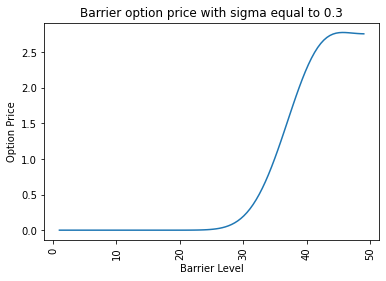

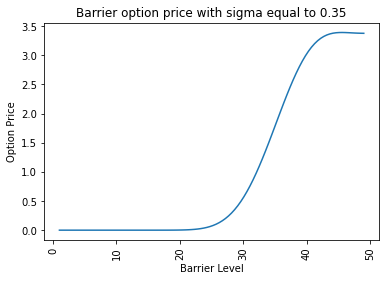

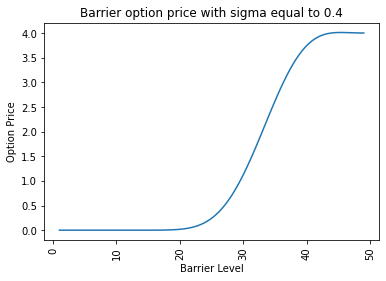

In [26]:
T = 5/12
S0=50
r=0.10
K=50

sigma = [0.3,0.35,0.4]
barrier = np.linspace(1, 49, 100)

for i in sigma:
    
    res = []
    
    for j in barrier:
        
        result=DownInPut(S0,K,r,T,i,j)
        res.append(result)

    plt.plot(barrier,res)
    plt.title('Barrier option price with sigma equal to ' + str(i))
    plt.xlabel('Barrier Level')
    plt.xticks(rotation=90)
    plt.ylabel('Option Price')

    plt.show()

First, we can see that the higher the volatility, the higher the option premium. This principle also works for Down-and-In put options. Second, we can see that as the barrier increases, the premium also increases. And when the barrier is lower than 20, the premium is around 0. Because for Down-and-In options it can only be excercised when the price is lower than the barrier, so this result makes sense. It means that the proablility for the S to be under 20 is around 0 with S0=50.

We also simulate the underlying dynamics to check whether yhe closed form works

In [27]:
def Stock_Path_Simulation(Stock,r,sigma,T,n_steps,n_paths):
    paths=0.0*np.zeros((n_paths,n_steps));
    paths[:,0]=Stock
    dt=T/n_steps
    drift=(r-0.5*sigma**2)*dt
    volatility=sigma*np.sqrt(dt)
    for i in range(0,n_paths):
        for j in range(0,n_steps-1):
            paths[i,j+1]=paths[i,j]*np.exp(drift+volatility*np.random.normal(0,1,1));
    return paths

def DownInPut_Simulated(S0,K,r,T,sigma,Sb):
    payoff=np.zeros(n_paths)
    for i in range(0,n_paths):
        GBM=Stock_Path_Simulation(S0,r,sigma,T,n_steps,1)
        if GBM[0,-1] < Sb:
            payoff[i] = np.maximum(0,K-GBM[0,-1])
        else:
            payoff[i] = 0
    p=np.mean(np.exp(-r*T)*payoff)
    return p


we take number of steps = 100 and paths simulated = 1000

In [28]:
n_steps=100 #number of steps
n_paths=1000 #number of paths generated

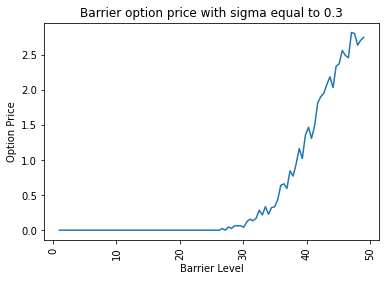

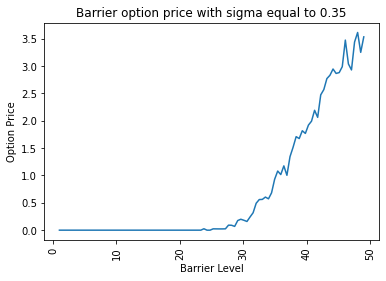

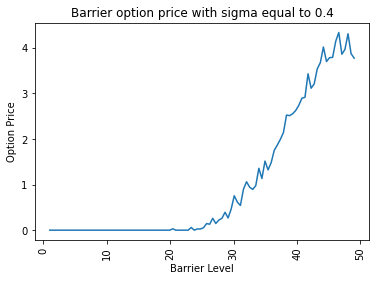

In [29]:
T = 5/12
S0=50
r=0.10
K=50

sigma = [0.3,0.35,0.4]
barrier = np.linspace(1, 49, 100)

for i in sigma:
    
    res = []
    
    for j in barrier:
        
        result=DownInPut_Simulated(S0,K,r,T,i,j)
        res.append(result)

    plt.plot(barrier,res)
    plt.title('Barrier option price with sigma equal to ' + str(i))
    plt.xlabel('Barrier Level')
    plt.xticks(rotation=90)
    plt.ylabel('Option Price')

    plt.show()

From the Monte Carlo simulation we have a very similar dynamics to the closed form, of course with some more dispersion given that we should increase the number of simulations to have a proper smooth line

EX 4

We recompute the exercises assuming this time a Heston process for the underlying. Since there is no closed form for the Down-In-Put under Heston dynamics, we have to simulate the process troguh Monte Carlo to retreive the price

In [30]:
S0 = 50 #current stock price
K= 50 # strike price
T = 5/12 # time to maturity, equivalent to 5 months
r = 0.10 # risk-free interest rate
kappa = 2 # mean reversion parameter
vbar = 0.35**2 # long term variance
v0 = 0.35**2 # current variance
rho = 0 # correlation coefficient
eta = 0.25 # volatility of variance parameter
NSTeps = 100
dt = T/NSTeps
param =[kappa,vbar,eta,rho] 

In [31]:
def Heston_Paths(S0,v0,param,NSteps,dt):
    
    size = (1, NSteps)
    prices = np.zeros(size)
    prices[:, 0] = S0
    S_t = S0
    v_t = v0
    
    for t in range(NSteps):
        WT = np.random.multivariate_normal(np.array([0,0]), cov = np.array([[1,rho],[rho,1]]), size= 1) * np.sqrt(dt) 
        S_t = S_t*(np.exp( (r- 0.5*v_t)*dt+ np.sqrt(v_t)*np.sqrt(dt) *WT[:,0])) 
        v_t = np.abs(v_t + kappa*(vbar-v_t)*dt + eta*np.sqrt(v_t)*WT[:,1])
        prices[:, 0] = S0
        prices[:, t] = S_t
    
    return prices

In [32]:
def DownInPutMC(S0,K,r,dt,param,Sb,NSTeps,NPaths):
    payoff = np.zeros(NPaths)
    for i in range(0,NPaths):
        path = Heston_Paths(S0, v0, param, NSteps, dt)
        if path[0,-1].any() < Sb:
            payoff[i] = np.maximum(0,K-path[0,-1])
        else:
            payoff[i] = 0
    premium,se = np.mean(np.exp(-r*dt)*payoff),sp.stats.sem(np.exp(-r*dt)*payoff)   
    return premium,se

We compute the option price and the confidence interval associated to it

In [33]:
r=0.1
Sb=30
NSteps=500
NPaths=1000
dt = T/NSTeps
premium,se = DownInPutMC(S0,K,r,dt,param, Sb,NSteps, NPaths)
print('The premium of a Down-and-in Put option for K='+str(K)+'and a barrier='+str(Sb)+' is : '+str(premium))
print('The standard error is : '+str(se))

The premium of a Down-and-in Put option for K=50and a barrier=30 is : 0.03446255836637097
The standard error is : 0.008014249350747259


In [34]:
m = premium
s = se
t95=sps.norm.ppf(0.975)

In [35]:
CI_95=(round(m-t95*s,5), round(m+t95*s,5))
print(f"The 95% confidence interval is: "+str(CI_95))

The 95% confidence interval is: (0.01875, 0.05017)


In [36]:
t90=sps.norm.ppf(0.95)
CI_90=(round(m-t90*s,5), round(m+t90*s,5))
print(f"The 90% confidence interval is: "+str(CI_90))

The 90% confidence interval is: (0.02128, 0.04764)


EX 5

We define the function giving us the value of a Geometric Asian Call giving us a closed form

In [38]:
def GeomAsianCall(S0,K,r,T,sigma,NSteps):
    v = r-0.5*sigma**2
    dt = T/NSteps
    a = np.log(S0)+v*dt+(1/2)*v*(T-dt)
    b = sigma**2*dt+((sigma**2*(T-dt))/(6*NSteps))*(2*NSteps-1)
    x = (a-np.log(K)+b)/(np.sqrt(b))
    p = np.exp(-r*T)*(np.exp(a+(1/2)*b)*sp.stats.norm.cdf(x)-K*sp.stats.norm.cdf(x-np.sqrt(b)))
    return p

We compare our result with the one written in the assignment and it coincides, thus our function works properly

In [39]:
GeomAsianCall(50,55,0.05,1/12,0.40,12)

0.158104065012161

We now compute the price trough Monte Carlo simulation

In [40]:
def AssetPaths(S0,mu,sigma,T,NSamples,NRepl): ### !!! output ,length ofpath =N 
    #code to generate asset price paths by Monte Carlo simulation
    SPaths =0.0* np.zeros((NRepl,NSamples));
    SPaths[:,0] = S0;
    dt = T/NSamples;
    nudt = (mu-0.5*sigma**2)*dt;
    sidt = sigma*np.sqrt(dt) ;
    for i in range(0,NRepl):
        for j in range(0,NSamples-1):
            SPaths[i,j+1] = SPaths[i,j]*np.exp(nudt+sidt*np.random.normal(0,1,1));
    return SPaths

def AsianMC(S0,K,r,T,sigma,NSamples,NRepl):
    #Monte Carlo simulation for an Asian option
    Payoff = np.zeros(NRepl);
    for i in range(0,NRepl):
        Path = AssetPaths(S0,r,sigma,T,NSamples,1);
        Payoff[i] = np.maximum(0,np.mean(Path[0,:])-K);
    p,se = np.mean(np.exp(-r*T)*Payoff),sp.stats.sem(np.exp(-r*T)*Payoff);   
    return p,se

In [41]:
print("Asian arithmetic average rate Call option by Monte Carlo simulation")
print(f"Price: {round(AsianMC(50,55,0.05,1/12,0.4,12,1000)[0],3)}")
print(f"Standard Error: {round(AsianMC(50,55,0.05,1/12,0.4,12,1000)[1],3)}")

Asian arithmetic average rate Call option by Monte Carlo simulation
Price: 0.107
Standard Error: 0.019


We can clearly see that the estimation is not very accurate, as the real price lies after 2 standard deviation from the estimated mean price

We now proceed by looking at control variables, starting with the geometric average rate call option

In [44]:
def AsianMCCV_geom(S0,K,r,T,sigma,NSamples,NRepl,NPilot):

    samplePath = AssetPaths(S0,r,sigma,T,NSamples,NPilot);
    armean = np.mean(samplePath[:,0:(NSamples)],1);
    geomean = (np.prod(samplePath,1))**(1/NSamples)
    VA_hat = np.exp(-r*T)*np.maximum(0,armean-K);   
    VB_hats = np.exp(-r*T)*np.maximum(0,geomean-K);  
    
    MatCov = np.cov(VA_hat,VB_hats);
    
    c = -MatCov[0,1]/np.var(VB_hats);  
    dt = T/NSamples;  
    VB = GeomAsianCall(S0,K,r,T,sigma,12); #VB is ExpSum
    
    #MC run
    ControlVars = np.zeros(NRepl);
    for i in range(0,NRepl):
        StockPath = AssetPaths(S0,r,sigma,T,NSamples,1);
        Payoff = np.exp(-r*T)*np.maximum(0,np.mean(StockPath[0,])-K);  
        geomprice = np.exp(-r*T)*np.maximum(0,(np.prod(StockPath[0,]))**(1/NSamples)-K); 
        ControlVars[i] = Payoff +c*(geomprice-VB);
        
    p,se = np.mean(ControlVars),sp.stats.sem(ControlVars);   
    return p,se

In [45]:
AsianMCCV_geom(50,55,0.05,1/12,0.4,12,9000,1000)

(0.17225296368793058, 0.00023665038968587605)

In [47]:
AsianMCCV_geom(50,55,0.05,1/12,0.4,12,9000,100000)

(0.17144454138938525, 0.00022577546960936482)

We can see that the precision doesn't increases considerably but it gets closer to the true theoretical value

In [48]:
def AsianMCCV(S0,K,r,T,sigma,NSamples,NRepl,NPilot):
    #Monte Carlo simulation with control variates for an Asian option.
    #pilot replications to set control parameter
    samplePath = AssetPaths(S0,r,sigma,T,NSamples,NPilot);
    armean = np.mean(samplePath[:,0:(NSamples)],1);
    asum   =np.sum(samplePath,1)
    VA_hat = np.exp(-r*T)*np.maximum(0,armean-K);   
    VB_hats= np.exp(-r*T)*asum;  
    MatCov = np.cov(VA_hat,VB_hats);
    
    c = -MatCov[0,1]/np.var(VB_hats);  
    dt = T/NSamples;  
    VB = S0*(1-np.exp((NSamples+1)*r*dt))/(1-np.exp(r*dt)); #VB is ExpSum
    
    #MC run
    ControlVars = np.zeros(NRepl);
    for i in range(0,NRepl):
        StockPath = AssetPaths(S0,r,sigma,T,NSamples,1);
        Payoff = np.exp(-r*T)*max(0,np.mean(StockPath[0,])-K);
        ControlVars[i] = Payoff+c*(sum(StockPath[0,])-VB);
    
    p,se = np.mean(ControlVars),sp.stats.sem(ControlVars);   
    return p,se

In [49]:
AsianMCCV(50,55,0.05,1/12,0.4,12,9000,1000)

(0.4887019377003547, 0.005032104317456885)

In [50]:
AsianMCCV(50,55,0.05,1/12,0.4,12,9000,100000)

(0.4366142470298912, 0.004677251422990504)

As before, we can see that precision doesn't increase considerably, and the control variable overestimates the theoretical price in this case